In [1]:
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

data = pd.read_csv("otu.csv")
transposed_data = data.transpose()
le = LabelEncoder()
y = transposed_data.iloc[:, 0].values
encoded_y = le.fit_transform(y)
y = encoded_y.reshape(271, 1)
x = data.drop([0])
transposed_x = x.transpose()
scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(transposed_x)
new_x = pd.DataFrame(scaled_x)



C:\Users\fbuse\AppData\Local\Temp\ipykernel_8100\4266990499.py:8: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,2

In [2]:
#Perceptron
shuffler = ShuffleSplit(n_splits=3, train_size=0.8, test_size=0.2, random_state=42)
perceptron_model = Perceptron()

train_index, test_index = next(shuffler.split(new_x, y))
x_train, x_test = new_x.iloc[train_index], new_x.iloc[test_index]
y_train, y_test = y[train_index], y[test_index]

# Perceptron eğitim
perceptron_model.fit(x_train, y_train.ravel())
y_pred_perceptron = perceptron_model.predict(x_test)

# Doğruluk(Accuracy) hassasiyet(Sensitivity) ve özgünlük(Specificity) hesaplama
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
tn_perceptron, fp_perceptron, fn_perceptron, tp_perceptron = confusion_matrix(y_test, y_pred_perceptron).ravel()
sensitivity_perceptron = tp_perceptron / (tp_perceptron + fn_perceptron)
specificity_perceptron = tn_perceptron / (tn_perceptron + fp_perceptron)

print("Accuracy:", accuracy_perceptron)
print("Sensitivity:", sensitivity_perceptron)
print("Specificity:", specificity_perceptron)

fpr_perceptron, tpr_perceptron, thresholds_perceptron = roc_curve(y_test, y_pred_perceptron)
auc_perceptron = roc_auc_score(y_test, y_pred_perceptron)
print("Perceptron AUC:", auc_perceptron)


Accuracy: 0.7090909090909091
Sensitivity: 0.7307692307692307
Specificity: 0.6896551724137931
Perceptron AUC: 0.710212201591512


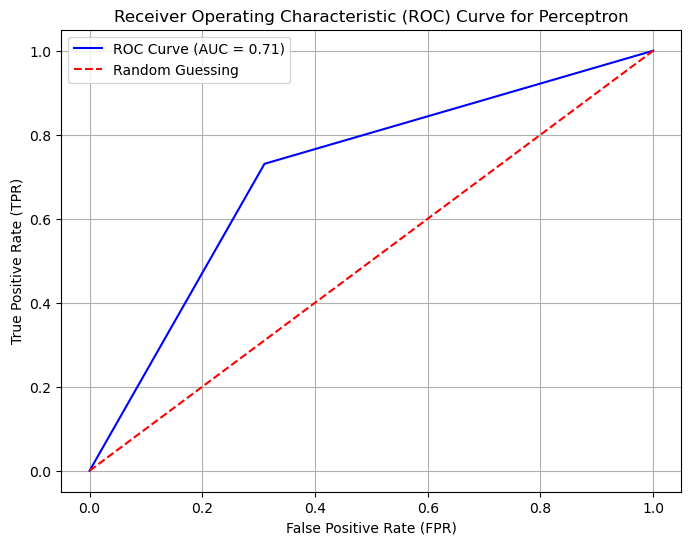

In [3]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_perceptron, tpr_perceptron, color='blue', label='ROC Curve (AUC = %0.2f)' % auc_perceptron)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Perceptron')
plt.legend()
plt.grid()